## SVM

# Overview of Support Vector Machines (SVMs)

## What are SVMs?
Support Vector Machines (SVMs) are supervised machine learning models designed for both classification and regression tasks. They work by finding a hyperplane in a high-dimensional space that best separates the data points into classes. The "best" hyperplane is defined as the one that maximizes the margin, i.e., the distance between the hyperplane and the nearest data points from each class, which are called support vectors.

## Why are SVMs Linear Separators?
SVMs are linear separators because their core objective is to find a straight hyperplane that divides the data. In linearly separable datasets, this hyperplane can perfectly classify the data points into their respective classes while maximizing the margin, leading to better generalization.

For non-linear datasets, SVMs can still achieve separation by transforming the data into a higher-dimensional space where a linear hyperplane becomes possible.

## How Do Kernels Work?
Kernels are mathematical functions that allow SVMs to handle non-linear relationships in the data by implicitly mapping input features into a higher-dimensional feature space. This transformation enables the SVM to find a linear hyperplane in the transformed space, which corresponds to a non-linear boundary in the original input space.

Common kernel types include:

**Linear Kernel**: For linearly separable data.
**Polynomial Kernel**: Maps data to a higher polynomial dimension.
**Radial Basis Function (RBF) Kernel**: Captures more complex relationships by mapping data into infinite-dimensional spaces.

## Why is the Dot Product Critical?
The dot product measures the similarity between two vectors in the transformed feature space. Kernels use the dot product to compute this similarity directly in the transformed space without explicitly performing the high-dimensional transformation (a concept known as the "kernel trick"). This efficiency allows SVMs to handle complex datasets while minimizing computational overhead.

## Polynomial and RBF Kernel Functions
- **Polynomial Kernel**: 
  \
  $$K(x, x') = (\gamma \langle x, x' \rangle + r)^d$$
  \
  Allows for curved decision boundaries; \( r \) and \( d \) control complexity.
  
- **RBF Kernel**:
  \
  $$K(x, x') = \exp(-\gamma \| x - x' \|^2)$$
  \
  Uses radial distances to separate points in higher-dimensional space.

---

## Example: 2D Points with Polynomial Kernel
Given $ ( x = (1, 2))$ , $( x' = (2, 3)) $ , and a polynomial kernel  $ ( r = 1, d = 2 ) $:
1. Compute dot product:
  \
  $$ \langle x, x' \rangle = 1 \cdot 2 + 2 \cdot 3 = 8 $$
2. Kernel value:
   \
   $$ K(x, x') = (8 + 1)^2 = 81 $$
   \
   This maps the points into higher-dimensional space.

---

## Visualizations
1. **SVM Hyperplane**:
   - Illustration of the margin, support vectors, and separating hyperplane.
2. **Kernel Transformation**:
   - Show how data transforms from a 2D space to a higher-dimensional space.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN

In [2]:
df = pd.read_csv('/Users/Intel/Desktop/spring 2025/ML/ML_FINAL_PROJECT/Train_Preprocessed.csv')

In [3]:
df.head()

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,date,Unemployment_Rate,Credit_Score
0,2022-01-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",3.000000,...,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2022-01-01,4.0,Good
1,2022-02-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",4.428571,...,31.944960,268,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,2022-02-01,3.8,Good
2,2022-03-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",3.000000,...,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,2022-03-01,3.7,Good
3,2022-04-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",5.000000,...,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2022-04-01,3.7,Good
4,2022-05-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",6.000000,...,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2022-05-01,3.6,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int64  
 8   Type_of_Loan              100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

In [5]:
# Assuming df is your DataFrame
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['number']).columns

In [6]:
df1 = df[numerical_cols]

# Add the Label column to the numerical DataFrame
df1 = df1.join(df['Credit_Score'])

# Display the resulting DataFramed
df1.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Unemployment_Rate,Credit_Score
0,23,19114.12,3.0,4.0,3,4,3.000000,7.0,11.27,4.0,809.98,26.822620,265,49.574949,80.415295,312.494089,4.0,Good
1,23,19114.12,3.0,4.0,3,4,4.428571,6.0,11.27,4.0,809.98,31.944960,268,49.574949,118.280222,284.629162,3.8,Good
2,23,19114.12,3.0,4.0,3,4,3.000000,7.0,10.27,4.0,809.98,28.609352,267,49.574949,81.699521,331.209863,3.7,Good
3,23,19114.12,3.0,4.0,3,4,5.000000,4.0,6.27,4.0,809.98,31.377862,268,49.574949,199.458074,223.451310,3.7,Good
4,23,19114.12,3.0,4.0,3,4,6.000000,6.0,11.27,4.0,809.98,24.797347,269,49.574949,41.420153,341.489231,3.6,Good


In [7]:
# Split df1 into X (features) and y (target variable)
X = df1.drop(columns=['Credit_Score'])  # Drop 'Credit_Score' from features
y = df1['Credit_Score']  # Keep 'Credit_Score' as target variable

# Display the shapes of X and y
print(X.shape, y.shape)

(100000, 17) (100000,)


In [8]:
y = y.map({'Good': 0, 'Standard':2, 'Poor': 1})

In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Credit_Score, dtype: int64

In [10]:
# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the features
X_scaled = scaler.fit_transform(X)

# If you'd like to replace original X with scaled values
X = pd.DataFrame(X_scaled, columns=X.columns)

In [11]:
X.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Unemployment_Rate
0,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.220342,-1.011086,0.129931,-0.461511,-0.533485,-1.067562,0.439717,-0.497038,-0.709737,-0.380916,2.151657
1,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.123985,-1.170717,0.129931,-0.461511,-0.533485,-0.066489,0.469814,-0.497038,-0.390631,-0.571768,0.774597
2,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.220342,-1.011086,-0.017473,-0.461511,-0.533485,-0.718376,0.459782,-0.497038,-0.698914,-0.252728,0.086066
3,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.085442,-1.489979,-0.607090,-0.461511,-0.533485,-0.177318,0.469814,-0.497038,0.293494,-0.990787,0.086066
4,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.017993,-1.170717,0.129931,-0.461511,-0.533485,-1.463366,0.479846,-0.497038,-1.038368,-0.182323,-0.602464


* Check for class imbalance.

In [12]:
# Count unique values in the target variable y
y.value_counts()

Credit_Score
2    53174
1    28998
0    17828
Name: count, dtype: int64

In [13]:
# Initialize SMOTE with Edited Nearest Neighbors (for undersampling)
smote_enn = SMOTEENN(random_state=42)

# Resample the dataset (apply SMOTEENN to balance the data)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

/Users/Intel/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/Intel/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/Intel/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


### Kernels
##### 1) Linear

In [14]:
kernel = 'linear'
C = 0.1

# Train the model
svm_model = SVC(kernel=kernel, C=C, random_state=42)
svm_model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = svm_model.predict(X_test)
accuracy_linear_11 = accuracy_score(y_test, y_pred)
conf_matrix_linear_11 = confusion_matrix(y_test, y_pred)

# Display Accuracy and Confusion Matrix
print(f"Kernel: {kernel}, C: {C}")
print(f"Accuracy: {accuracy_linear_11 * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix_linear_11}")

Kernel: linear, C: 0.1
Accuracy: 77.85%
Confusion Matrix:
[[12794   356  1152]
 [ 1964  9555   616]
 [ 1964  1330  3593]]


In [15]:
print(f" Classification Report for Linear (only numeric data) with c = 0.1 :")
print(classification_report(y_test, y_pred))

 Classification Report for Linear (only numeric data) with c = 0.1 :
              precision    recall  f1-score   support

           0       0.77      0.89      0.82     14302
           1       0.85      0.79      0.82     12135
           2       0.67      0.52      0.59      6887

    accuracy                           0.78     33324
   macro avg       0.76      0.73      0.74     33324
weighted avg       0.78      0.78      0.77     33324



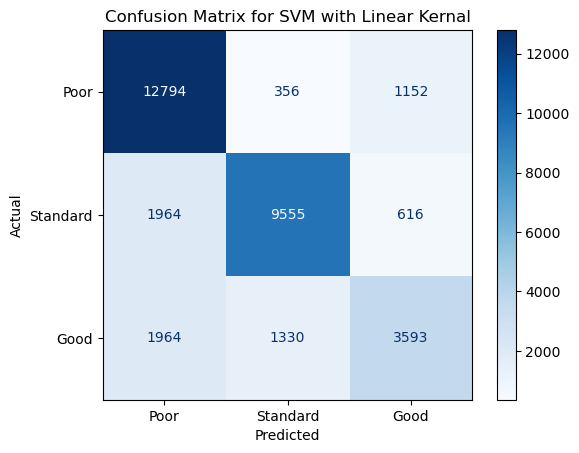

In [16]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_linear_11, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM with Linear Kernal")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
kernel = 'linear'
C = 1

# Train the model
svm_model = SVC(kernel=kernel, C=C, random_state=42)
svm_model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = svm_model.predict(X_test)
accuracy_linear_12 = accuracy_score(y_test, y_pred)
conf_matrix_linear_12 = confusion_matrix(y_test, y_pred)

# Display Accuracy and Confusion Matrix
print(f"Kernel: {kernel}, C: {C}")
print(f"Accuracy: {accuracy_linear_12 * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix_linear_12}")

Kernel: linear, C: 1
Accuracy: 77.85%
Confusion Matrix:
[[12796   356  1150]
 [ 1965  9555   615]
 [ 1963  1331  3593]]


In [18]:
print(f" Classification Report for Linear (only numeric data) with c = 1:")
print(classification_report(y_test, y_pred))

 Classification Report for Linear (only numeric data) with c = 1:
              precision    recall  f1-score   support

           0       0.77      0.89      0.82     14302
           1       0.85      0.79      0.82     12135
           2       0.67      0.52      0.59      6887

    accuracy                           0.78     33324
   macro avg       0.76      0.73      0.74     33324
weighted avg       0.78      0.78      0.77     33324



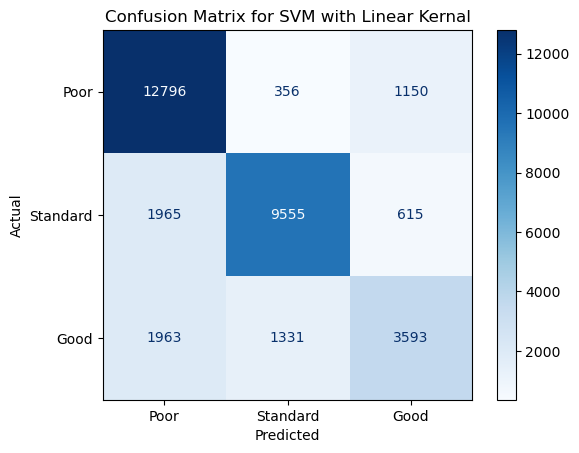

In [19]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_linear_12, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM with Linear Kernal")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
kernel = 'linear'
C = 10

# Train the model
svm_model = SVC(kernel=kernel, C=C, random_state=42)
svm_model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = svm_model.predict(X_test)
accuracy_linear_13 = accuracy_score(y_test, y_pred)
conf_matrix_linear_13 = confusion_matrix(y_test, y_pred)

# Display Accuracy and Confusion Matrix
print(f"Kernel: {kernel}, C: {C}")
print(f"Accuracy: {accuracy_linear_13 * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix_linear_13}")

Kernel: linear, C: 10
Accuracy: 77.85%
Confusion Matrix:
[[12795   356  1151]
 [ 1964  9555   616]
 [ 1962  1332  3593]]


In [21]:
print(f" Classification Report for Linear (only numeric data) with c = 10:")
print(classification_report(y_test, y_pred))

 Classification Report for Linear (only numeric data) with c = 10:
              precision    recall  f1-score   support

           0       0.77      0.89      0.82     14302
           1       0.85      0.79      0.82     12135
           2       0.67      0.52      0.59      6887

    accuracy                           0.78     33324
   macro avg       0.76      0.73      0.74     33324
weighted avg       0.78      0.78      0.77     33324



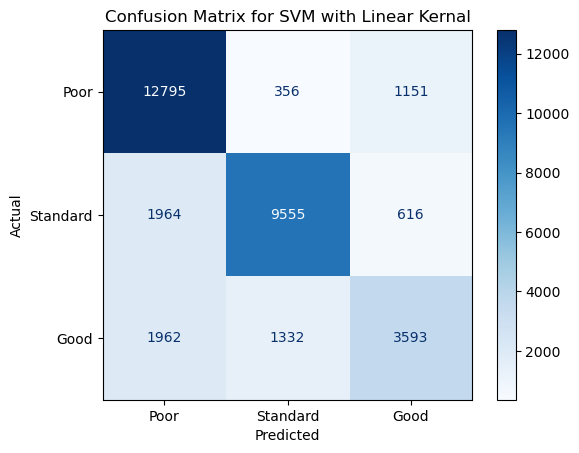

In [22]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_linear_13, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM with Linear Kernal")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

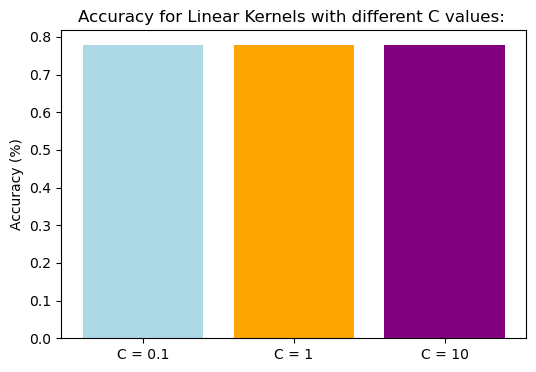

In [23]:
# Define colors for each kernel
colors = ['lightblue', 'orange', 'purple']

plt.figure(figsize=(6, 4))
plt.bar('C = 0.1', accuracy_linear_11, color=colors[0])
plt.bar('C = 1', accuracy_linear_12, color=colors[1])
plt.bar('C = 10', accuracy_linear_13, color=colors[2])

plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Linear Kernels with different C values: ')
plt.show()

##### 2) Poly

In [24]:
kernel = 'poly'
C = 0.1

# Repeat for polynomial kernel and cost C=0.1
svm_model = SVC(kernel=kernel, C=C, random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy_poly_11 = accuracy_score(y_test, y_pred)
conf_matrix_poly_11 = confusion_matrix(y_test, y_pred)

print(f"Kernel: {kernel}, C: {C}")
print(f"Accuracy: {accuracy_poly_11 * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix_poly_11}")

Kernel: poly, C: 0.1
Accuracy: 79.87%
Confusion Matrix:
[[12859   351  1092]
 [ 1808  9736   591]
 [ 1568  1298  4021]]


In [25]:
print(f" Classification Report for Poly (only numeric data) with c = 0.1:")
print(classification_report(y_test, y_pred))

 Classification Report for Poly (only numeric data) with c = 0.1:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84     14302
           1       0.86      0.80      0.83     12135
           2       0.70      0.58      0.64      6887

    accuracy                           0.80     33324
   macro avg       0.78      0.76      0.77     33324
weighted avg       0.80      0.80      0.79     33324



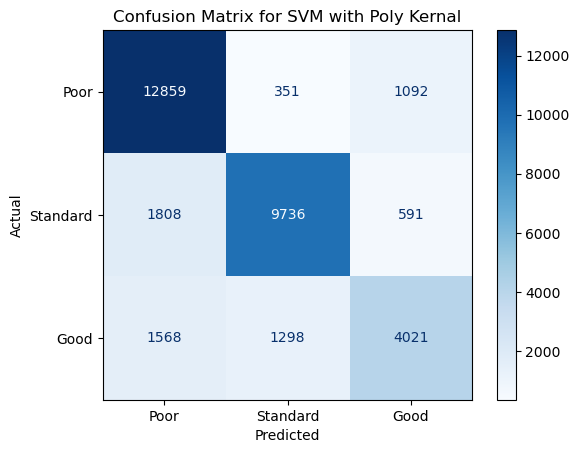

In [26]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_poly_11, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM with Poly Kernal")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
kernel = 'poly'
C = 1

# Repeat for polynomial kernel and cost C=0.1
svm_model = SVC(kernel=kernel, C=C, random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy_poly_12 = accuracy_score(y_test, y_pred)
conf_matrix_poly_12 = confusion_matrix(y_test, y_pred)

print(f"Kernel: {kernel}, C: {C}")
print(f"Accuracy: {accuracy_poly_12 * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix_poly_12}")

Kernel: poly, C: 1
Accuracy: 80.83%
Confusion Matrix:
[[12945   352  1005]
 [ 1604  9869   662]
 [ 1529  1235  4123]]


In [28]:
print(f" Classification Report for Poly (only numeric data) with c = 1:")
print(classification_report(y_test, y_pred))

 Classification Report for Poly (only numeric data) with c = 1:
              precision    recall  f1-score   support

           0       0.81      0.91      0.85     14302
           1       0.86      0.81      0.84     12135
           2       0.71      0.60      0.65      6887

    accuracy                           0.81     33324
   macro avg       0.79      0.77      0.78     33324
weighted avg       0.81      0.81      0.80     33324



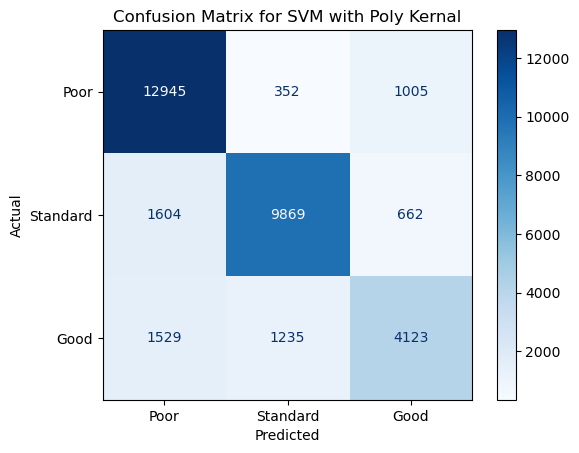

In [29]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_poly_12, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM with Poly Kernal")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
kernel = 'poly'
C = 10

# Repeat for polynomial kernel and cost C=0.1
svm_model = SVC(kernel=kernel, C=C, random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy_poly_13 = accuracy_score(y_test, y_pred)
conf_matrix_poly_13 = confusion_matrix(y_test, y_pred)

print(f"Kernel: {kernel}, C: {C}")
print(f"Accuracy: {accuracy_poly_13 * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix_poly_13}")

Kernel: poly, C: 10
Accuracy: 81.29%
Confusion Matrix:
[[13040   337   925]
 [ 1475  9944   716]
 [ 1583  1199  4105]]


In [31]:
print(f" Classification Report for Poly (only numeric data) with c = 10: ")
print(classification_report(y_test, y_pred))

 Classification Report for Poly (only numeric data) with c = 10: 
              precision    recall  f1-score   support

           0       0.81      0.91      0.86     14302
           1       0.87      0.82      0.84     12135
           2       0.71      0.60      0.65      6887

    accuracy                           0.81     33324
   macro avg       0.80      0.78      0.78     33324
weighted avg       0.81      0.81      0.81     33324



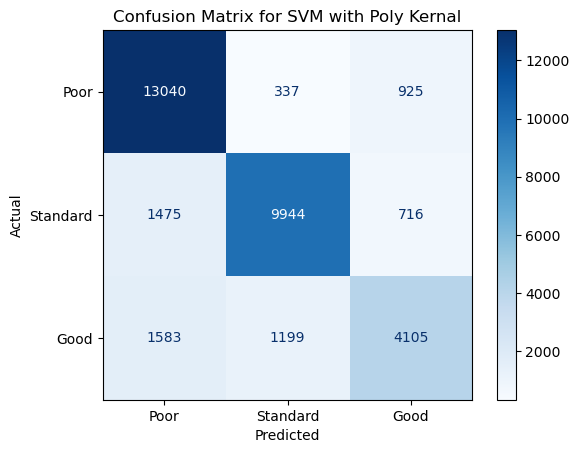

In [32]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_poly_13, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM with Poly Kernal")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

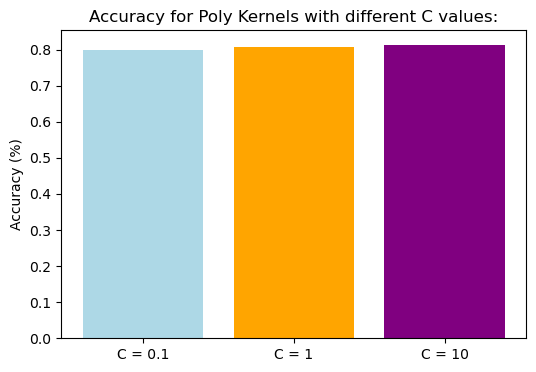

In [33]:
# Define colors for each kernel
colors = ['lightblue', 'orange', 'purple']

plt.figure(figsize=(6, 4))
plt.bar('C = 0.1', accuracy_poly_11, color=colors[0])
plt.bar('C = 1', accuracy_poly_12, color=colors[1])
plt.bar('C = 10', accuracy_poly_13, color=colors[2])

plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Poly Kernels with different C values:')
plt.show()

##### 3) RBF

In [34]:
kernel = 'rbf'
C = 0.1

# Repeat for RBF kernel and cost C=10
svm_model = SVC(kernel=kernel, C=C, random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy_rbf_11 = accuracy_score(y_test, y_pred)
conf_matrix_rbf_11 = confusion_matrix(y_test, y_pred)

print(f"Kernel: {kernel}, C: {C}")
print(f"Accuracy: {accuracy_rbf_11 * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix_rbf_11}")

Kernel: rbf, C: 0.1
Accuracy: 81.12%
Confusion Matrix:
[[12918   328  1056]
 [ 1830  9808   497]
 [ 1458  1123  4306]]


In [35]:
print(f" Classification Report for RBF (only numeric data) with c = 0.1:")
print(classification_report(y_test, y_pred))

 Classification Report for RBF (only numeric data) with c = 0.1:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85     14302
           1       0.87      0.81      0.84     12135
           2       0.73      0.63      0.68      6887

    accuracy                           0.81     33324
   macro avg       0.80      0.78      0.79     33324
weighted avg       0.81      0.81      0.81     33324



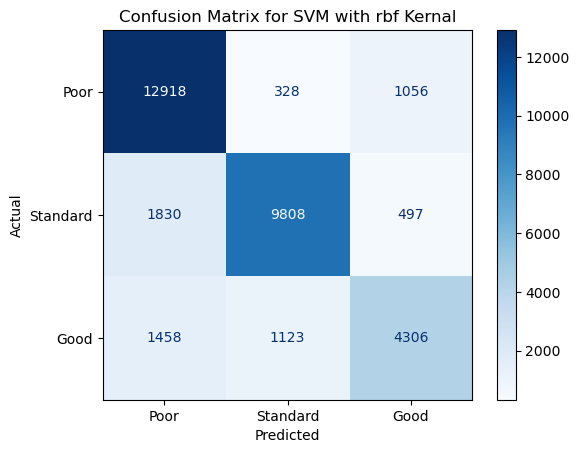

In [36]:
# Display confusion matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rbf_11, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM with rbf Kernal")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
kernel = 'rbf'
C = 1

# Repeat for RBF kernel and cost C=10
svm_model = SVC(kernel=kernel, C=C, random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy_rbf_12 = accuracy_score(y_test, y_pred)
conf_matrix_rbf_12 = confusion_matrix(y_test, y_pred)

print(f"Kernel: {kernel}, C: {C}")
print(f"Accuracy: {accuracy_rbf_12 * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix_rbf_12}")

Kernel: rbf, C: 1
Accuracy: 83.49%
Confusion Matrix:
[[13163   328   811]
 [ 1516 10167   452]
 [ 1354  1040  4493]]


In [38]:
print(f" Classification Report for RBF (only numeric data) with c = 1:")
print(classification_report(y_test, y_pred))

 Classification Report for RBF (only numeric data) with c = 1:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87     14302
           1       0.88      0.84      0.86     12135
           2       0.78      0.65      0.71      6887

    accuracy                           0.83     33324
   macro avg       0.83      0.80      0.81     33324
weighted avg       0.83      0.83      0.83     33324



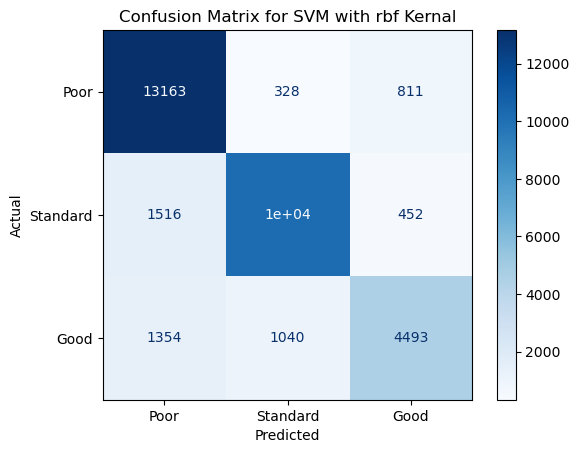

In [39]:
# Display confusion matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rbf_12, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM with rbf Kernal")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
kernel = 'rbf'
C = 10

# Repeat for RBF kernel and cost C=10
svm_model = SVC(kernel=kernel, C=C, random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy_rbf_13 = accuracy_score(y_test, y_pred)
conf_matrix_rbf_13 = confusion_matrix(y_test, y_pred)

print(f"Kernel: {kernel}, C: {C}")
print(f"Accuracy: {accuracy_rbf_13 * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix_rbf_13}")

Kernel: rbf, C: 10
Accuracy: 87.91%
Confusion Matrix:
[[13652   160   490]
 [ 1029 10664   442]
 [ 1159   748  4980]]


In [41]:
print(f" Classification Report for RBF (only numeric data) with c = 10:")
print(classification_report(y_test, y_pred))

 Classification Report for RBF (only numeric data) with c = 10:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     14302
           1       0.92      0.88      0.90     12135
           2       0.84      0.72      0.78      6887

    accuracy                           0.88     33324
   macro avg       0.88      0.85      0.86     33324
weighted avg       0.88      0.88      0.88     33324



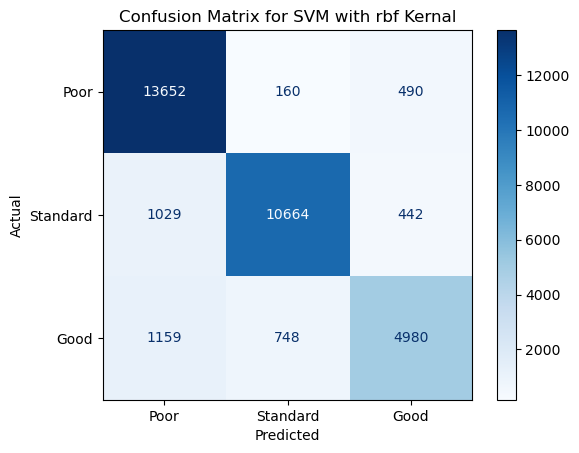

In [42]:
# Display confusion matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rbf_13, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM with rbf Kernal")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

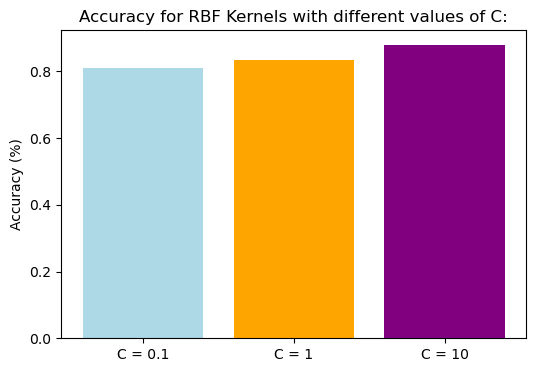

In [43]:
# Define colors for each kernel
colors = ['lightblue', 'orange', 'purple']

plt.figure(figsize=(6, 4))
plt.bar('C = 0.1', accuracy_rbf_11, color=colors[0])
plt.bar('C = 1', accuracy_rbf_12, color=colors[1])
plt.bar('C = 10', accuracy_rbf_13, color=colors[2])

plt.ylabel('Accuracy (%)')
plt.title('Accuracy for RBF Kernels with different values of C:')
plt.show()

#### Accuracy of all kernels for best value of C

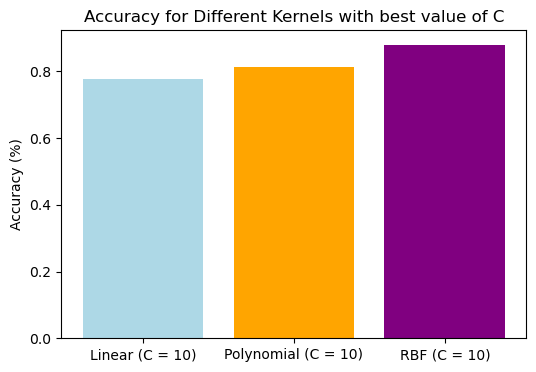

In [44]:
# Define colors for each kernel
colors = ['lightblue', 'orange', 'purple']

plt.figure(figsize=(6, 4))
plt.bar('Linear (C = 10)', accuracy_linear_13, color=colors[0])
plt.bar('Polynomial (C = 10)', accuracy_poly_13, color=colors[1])
plt.bar('RBF (C = 10)', accuracy_rbf_13, color=colors[2])

plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Different Kernels with best value of C')
plt.show()

* Now, let us try adding the ordinal data to check if the accuracy increases or not.

In [45]:
df2 = df[categorical_cols]

In [46]:
df2.head()

,Month,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,date,Credit_Score
0,2022-01-01,Scientist,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",Good,No,High_spent_Small_value_payments,2022-01-01,Good
1,2022-02-01,Scientist,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",Good,No,Low_spent_Large_value_payments,2022-02-01,Good
2,2022-03-01,Scientist,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",Good,No,Low_spent_Medium_value_payments,2022-03-01,Good
3,2022-04-01,Scientist,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",Good,No,Low_spent_Small_value_payments,2022-04-01,Good
4,2022-05-01,Scientist,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",Good,No,High_spent_Medium_value_payments,2022-05-01,Good


In [47]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Select the columns to process
cols_to_encode = ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

# Label encoding the selected columns
label_encoders = {}
for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for reference

# Normalize the encoded columns
scaler = StandardScaler()
normalized_cols = scaler.fit_transform(df[cols_to_encode])

# Create a new dataframe with the normalized columns
normalized_df = pd.DataFrame(normalized_cols, columns=cols_to_encode, index=df.index)

# Add the normalized columns to X
X = pd.concat([X, normalized_df], axis=1)

In [48]:
X.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Unemployment_Rate,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
0,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.220342,-1.011086,0.129931,-0.461511,-0.533485,-1.067562,0.439717,-0.497038,-0.709737,-0.380916,2.151657,-0.274417,-1.210371,-0.394488
1,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.123985,-1.170717,0.129931,-0.461511,-0.533485,-0.066489,0.469814,-0.497038,-0.390631,-0.571768,0.774597,-0.274417,-1.210371,0.142969
2,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.220342,-1.011086,-0.017473,-0.461511,-0.533485,-0.718376,0.459782,-0.497038,-0.698914,-0.252728,0.086066,-0.274417,-1.210371,0.680426
3,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.085442,-1.489979,-0.607090,-0.461511,-0.533485,-0.177318,0.469814,-0.497038,0.293494,-0.990787,0.086066,-0.274417,-1.210371,1.217882
4,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.017993,-1.170717,0.129931,-0.461511,-0.533485,-1.463366,0.479846,-0.497038,-1.038368,-0.182323,-0.602464,-0.274417,-1.210371,-0.931944


In [49]:
# Initialize SMOTE with Edited Nearest Neighbors (for undersampling)
smote_enn = SMOTEENN(random_state=42)

# Resample the dataset (apply SMOTEENN to balance the data)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

/Users/Intel/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/Intel/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/Intel/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


### Kernels
##### 1) Linear

In [50]:
kernel = 'linear'
C = 0.1

# Train the model
svm_model = SVC(kernel=kernel, C=C, random_state=42)
svm_model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = svm_model.predict(X_test)
accuracy_linear_21 = accuracy_score(y_test, y_pred)
conf_matrix_linear_21 = confusion_matrix(y_test, y_pred)

# Display Accuracy and Confusion Matrix
print(f"Kernel: {kernel}, C: {C}")
print(f"Accuracy: {accuracy_linear_21 * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix_linear_21}")

Kernel: linear, C: 0.1
Accuracy: 80.74%
Confusion Matrix:
[[12436   373  1672]
 [ 1748  9375  1053]
 [  548  1155  5635]]


In [51]:
print(f" Classification Report for Linear (Numeric and Ordinal data) with c = 0.1:")
print(classification_report(y_test, y_pred))

 Classification Report for Linear (Numeric and Ordinal data) with c = 0.1:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     14481
           1       0.86      0.77      0.81     12176
           2       0.67      0.77      0.72      7338

    accuracy                           0.81     33995
   macro avg       0.79      0.80      0.79     33995
weighted avg       0.81      0.81      0.81     33995



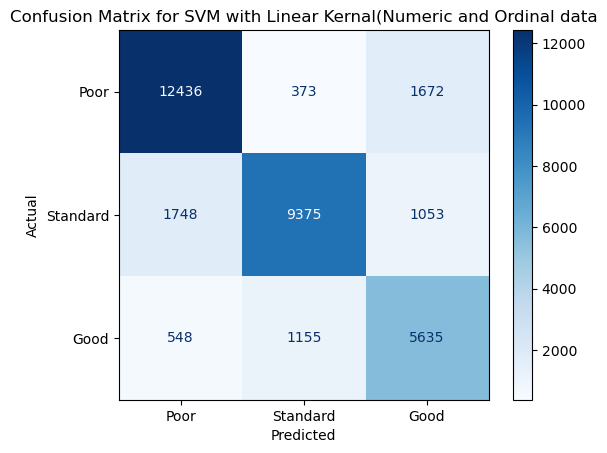

In [52]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_linear_21, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM with Linear Kernal(Numeric and Ordinal data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [53]:
kernel = 'linear'
C = 1

# Train the model
svm_model = SVC(kernel=kernel, C=C, random_state=42)
svm_model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = svm_model.predict(X_test)
accuracy_linear_22 = accuracy_score(y_test, y_pred)
conf_matrix_linear_22 = confusion_matrix(y_test, y_pred)

# Display Accuracy and Confusion Matrix
print(f"Kernel: {kernel}, C: {C}")
print(f"Accuracy: {accuracy_linear_22 * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix_linear_22}")

Kernel: linear, C: 1
Accuracy: 80.72%
Confusion Matrix:
[[12437   372  1672]
 [ 1748  9372  1056]
 [  551  1155  5632]]


In [54]:
print(f" Classification Report for Linear (Numeric and Ordinal data) with c = 1:")
print(classification_report(y_test, y_pred))

 Classification Report for Linear (Numeric and Ordinal data) with c = 1:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     14481
           1       0.86      0.77      0.81     12176
           2       0.67      0.77      0.72      7338

    accuracy                           0.81     33995
   macro avg       0.79      0.80      0.79     33995
weighted avg       0.81      0.81      0.81     33995



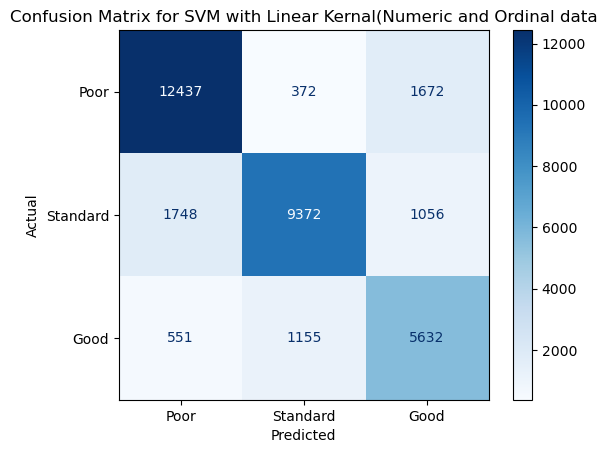

In [55]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_linear_22, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM with Linear Kernal(Numeric and Ordinal data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [56]:
kernel = 'linear'
C = 10

# Train the model
svm_model = SVC(kernel=kernel, C=C, random_state=42)
svm_model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = svm_model.predict(X_test)
accuracy_linear_23 = accuracy_score(y_test, y_pred)
conf_matrix_linear_23 = confusion_matrix(y_test, y_pred)

# Display Accuracy and Confusion Matrix
print(f"Kernel: {kernel}, C: {C}")
print(f"Accuracy: {accuracy_linear_23 * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix_linear_23}")

Kernel: linear, C: 10
Accuracy: 80.72%
Confusion Matrix:
[[12437   372  1672]
 [ 1748  9372  1056]
 [  550  1155  5633]]


In [57]:
print(f" Classification Report for Linear (Numeric and Ordinal data) with c = 10:")
print(classification_report(y_test, y_pred))

 Classification Report for Linear (Numeric and Ordinal data) with c = 10:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     14481
           1       0.86      0.77      0.81     12176
           2       0.67      0.77      0.72      7338

    accuracy                           0.81     33995
   macro avg       0.79      0.80      0.79     33995
weighted avg       0.81      0.81      0.81     33995



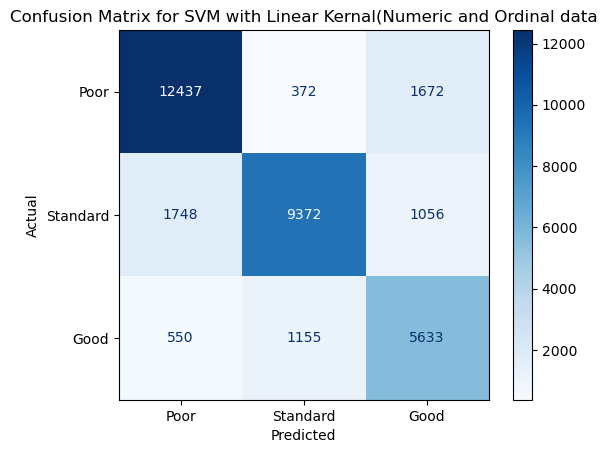

In [58]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_linear_23, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM with Linear Kernal(Numeric and Ordinal data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

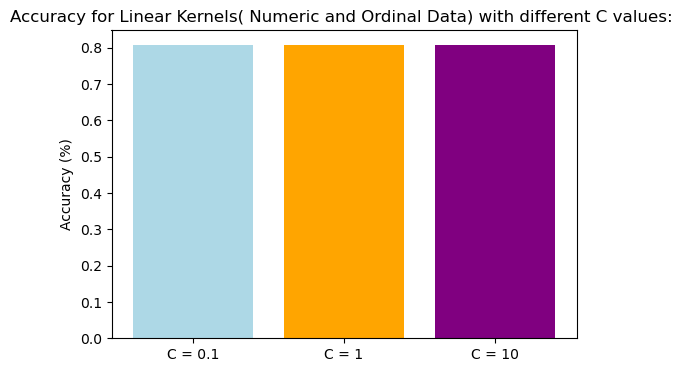

In [59]:
# Define colors for each kernel
colors = ['lightblue', 'orange', 'purple']

plt.figure(figsize=(6, 4))
plt.bar('C = 0.1', accuracy_linear_21, color=colors[0])
plt.bar('C = 1', accuracy_linear_22, color=colors[1])
plt.bar('C = 10', accuracy_linear_23, color=colors[2])

plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Linear Kernels( Numeric and Ordinal Data) with different C values: ')
plt.show()

##### 2) Poly

In [60]:
kernel = 'poly'
C = 0.1

# Repeat for polynomial kernel and cost C=0.1
svm_model = SVC(kernel=kernel, C=C, random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy_poly_21 = accuracy_score(y_test, y_pred)
conf_matrix_poly_21 = confusion_matrix(y_test, y_pred)

print(f"Kernel: {kernel}, C: {C}")
print(f"Accuracy: {accuracy_poly_21 * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix_poly_21}")

Kernel: poly, C: 0.1
Accuracy: 83.29%
Confusion Matrix:
[[12664   308  1509]
 [ 1711  9676   789]
 [  402   963  5973]]


In [61]:
print(f" Classification Report for Poly (Numeric and Ordinal data) with c = 0.1:")
print(classification_report(y_test, y_pred))

 Classification Report for Poly (Numeric and Ordinal data) with c = 0.1:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87     14481
           1       0.88      0.79      0.84     12176
           2       0.72      0.81      0.77      7338

    accuracy                           0.83     33995
   macro avg       0.82      0.83      0.82     33995
weighted avg       0.84      0.83      0.83     33995



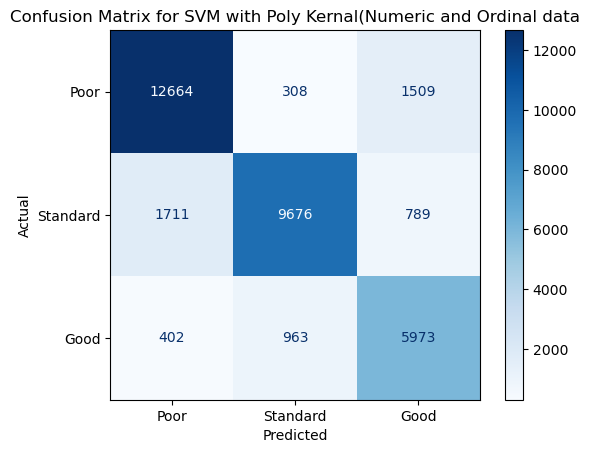

In [62]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_poly_21, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM with Poly Kernal(Numeric and Ordinal data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [63]:
kernel = 'poly'
C = 1

# Repeat for polynomial kernel and cost C=0.1
svm_model = SVC(kernel=kernel, C=C, random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy_poly_22 = accuracy_score(y_test, y_pred)
conf_matrix_poly_22 = confusion_matrix(y_test, y_pred)

print(f"Kernel: {kernel}, C: {C}")
print(f"Accuracy: {accuracy_poly_22 * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix_poly_22}")

Kernel: poly, C: 1
Accuracy: 85.23%
Confusion Matrix:
[[13035   304  1142]
 [ 1455 10097   624]
 [  544   953  5841]]


In [64]:
print(f" Classification Report for Poly (Numeric and Ordinal data) with c = 1:")
print(classification_report(y_test, y_pred))

 Classification Report for Poly (Numeric and Ordinal data) with c = 1:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     14481
           1       0.89      0.83      0.86     12176
           2       0.77      0.80      0.78      7338

    accuracy                           0.85     33995
   macro avg       0.84      0.84      0.84     33995
weighted avg       0.85      0.85      0.85     33995



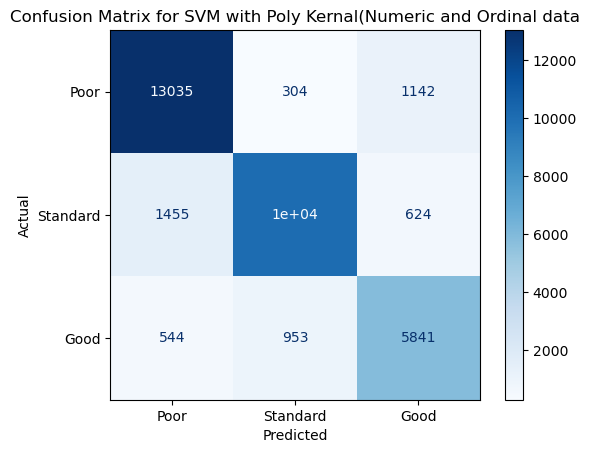

In [65]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_poly_22, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM with Poly Kernal(Numeric and Ordinal data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [66]:
kernel = 'poly'
C = 10

# Repeat for polynomial kernel and cost C=0.1
svm_model = SVC(kernel=kernel, C=C, random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy_poly_23 = accuracy_score(y_test, y_pred)
conf_matrix_poly_23 = confusion_matrix(y_test, y_pred)

print(f"Kernel: {kernel}, C: {C}")
print(f"Accuracy: {accuracy_poly_23 * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix_poly_23}")

Kernel: poly, C: 10
Accuracy: 87.02%
Confusion Matrix:
[[13390   289   802]
 [ 1240 10378   558]
 [  703   821  5814]]


In [67]:
print(f" Classification Report for Poly (Numeric and Ordinal data) with c = 10:")
print(classification_report(y_test, y_pred))

 Classification Report for Poly (Numeric and Ordinal data) with c = 10:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     14481
           1       0.90      0.85      0.88     12176
           2       0.81      0.79      0.80      7338

    accuracy                           0.87     33995
   macro avg       0.86      0.86      0.86     33995
weighted avg       0.87      0.87      0.87     33995



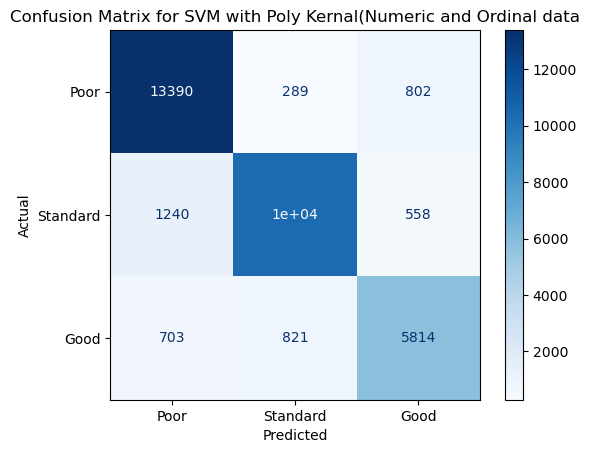

In [68]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_poly_23, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM with Poly Kernal(Numeric and Ordinal data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

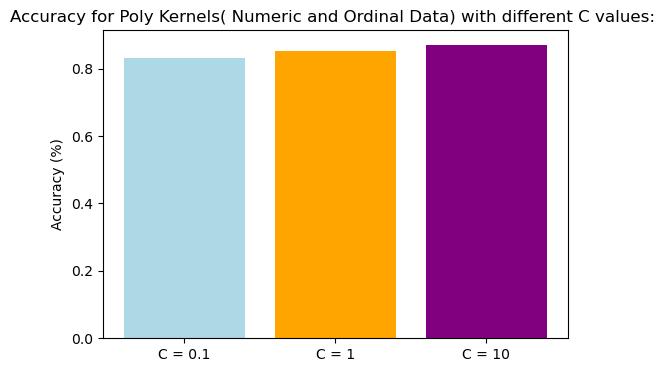

In [69]:
# Define colors for each kernel
colors = ['lightblue', 'orange', 'purple']

plt.figure(figsize=(6, 4))
plt.bar('C = 0.1', accuracy_poly_21, color=colors[0])
plt.bar('C = 1', accuracy_poly_22, color=colors[1])
plt.bar('C = 10', accuracy_poly_23, color=colors[2])

plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Poly Kernels( Numeric and Ordinal Data) with different C values: ')
plt.show()

##### 3) RBF

In [70]:
kernel = 'rbf'
C = 0.1

# Repeat for RBF kernel and cost C=10
svm_model = SVC(kernel=kernel, C=C, random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy_rbf_21 = accuracy_score(y_test, y_pred)
conf_matrix_rbf_21 = confusion_matrix(y_test, y_pred)

print(f"Kernel: {kernel}, C: {C}")
print(f"Accuracy: {accuracy_rbf_21 * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix_rbf_21}")

Kernel: rbf, C: 0.1
Accuracy: 83.39%
Confusion Matrix:
[[12546   346  1589]
 [ 1703  9834   639]
 [  344  1024  5970]]


In [71]:
print(f" Classification Report for RBF (Numeric and Ordinal data) with c = 0.1:")
print(classification_report(y_test, y_pred))

 Classification Report for RBF (Numeric and Ordinal data) with c = 0.1:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     14481
           1       0.88      0.81      0.84     12176
           2       0.73      0.81      0.77      7338

    accuracy                           0.83     33995
   macro avg       0.82      0.83      0.82     33995
weighted avg       0.84      0.83      0.83     33995



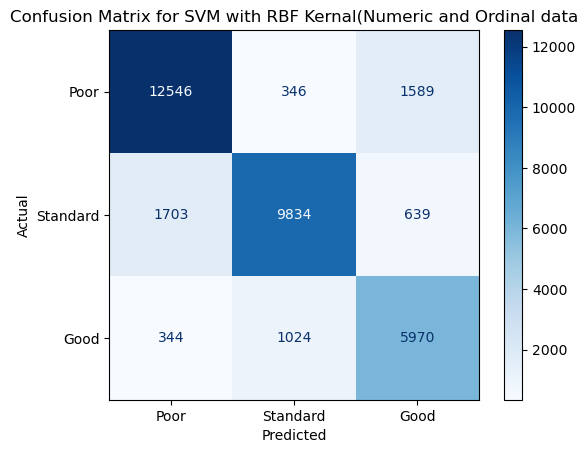

In [72]:
# Display confusion matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rbf_21, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM with RBF Kernal(Numeric and Ordinal data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [73]:
kernel = 'rbf'
C = 1

# Repeat for RBF kernel and cost C=10
svm_model = SVC(kernel=kernel, C=C, random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy_rbf_22 = accuracy_score(y_test, y_pred)
conf_matrix_rbf_22 = confusion_matrix(y_test, y_pred)

print(f"Kernel: {kernel}, C: {C}")
print(f"Accuracy: {accuracy_rbf_22 * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix_rbf_22}")

Kernel: rbf, C: 1
Accuracy: 86.12%
Confusion Matrix:
[[13214   319   948]
 [ 1382 10247   547]
 [  527   996  5815]]


In [74]:
print(f" Classification Report for RBF (Numeric and Ordinal data) with c = 1:")
print(classification_report(y_test, y_pred))

 Classification Report for RBF (Numeric and Ordinal data) with c = 1:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     14481
           1       0.89      0.84      0.86     12176
           2       0.80      0.79      0.79      7338

    accuracy                           0.86     33995
   macro avg       0.85      0.85      0.85     33995
weighted avg       0.86      0.86      0.86     33995



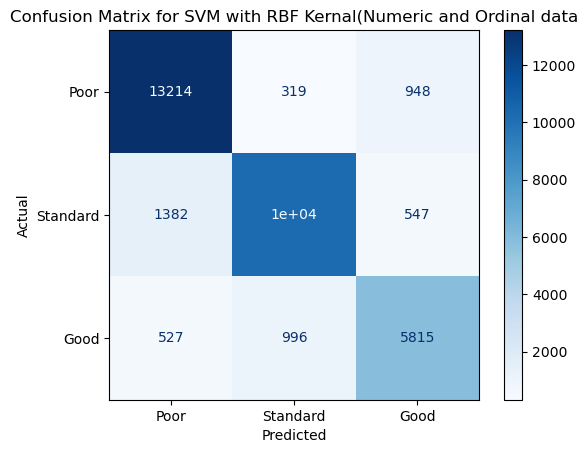

In [75]:
# Display confusion matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rbf_22, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM with RBF Kernal(Numeric and Ordinal data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [76]:
kernel = 'rbf'
C = 10

# Repeat for RBF kernel and cost C=10
svm_model = SVC(kernel=kernel, C=C, random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy_rbf_23 = accuracy_score(y_test, y_pred)
conf_matrix_rbf_23 = confusion_matrix(y_test, y_pred)

print(f"Kernel: {kernel}, C: {C}")
print(f"Accuracy: {accuracy_rbf_23 * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix_rbf_23}")

Kernel: rbf, C: 10
Accuracy: 90.78%
Confusion Matrix:
[[13939   140   402]
 [  932 10817   427]
 [  575   657  6106]]


In [77]:
print(f" Classification Report for RBF (Numeric and Ordinal data) with c = 10:")
print(classification_report(y_test, y_pred))

 Classification Report for RBF (Numeric and Ordinal data) with c = 10:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     14481
           1       0.93      0.89      0.91     12176
           2       0.88      0.83      0.86      7338

    accuracy                           0.91     33995
   macro avg       0.90      0.89      0.90     33995
weighted avg       0.91      0.91      0.91     33995



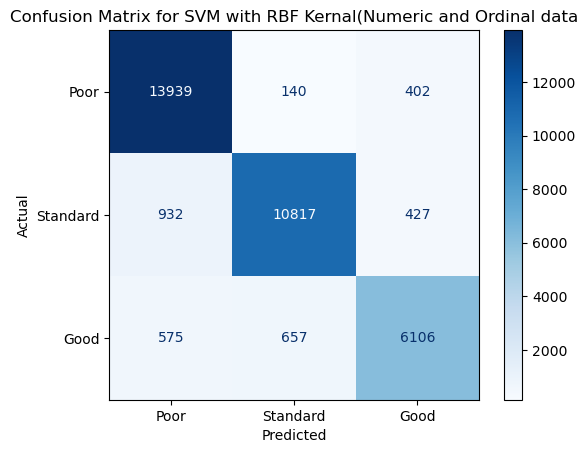

In [78]:
# Display confusion matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rbf_23, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM with RBF Kernal(Numeric and Ordinal data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

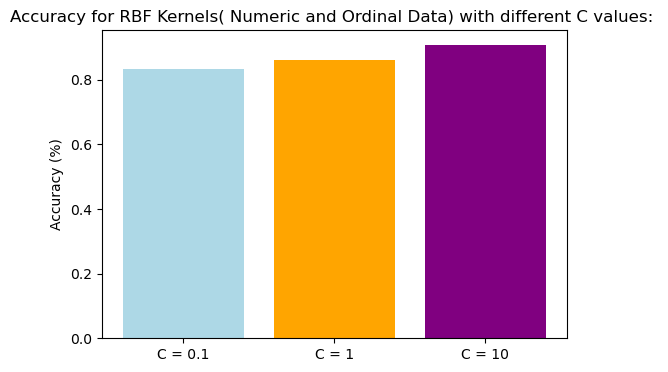

In [79]:
# Define colors for each kernel
colors = ['lightblue', 'orange', 'purple']

plt.figure(figsize=(6, 4))
plt.bar('C = 0.1', accuracy_rbf_21, color=colors[0])
plt.bar('C = 1', accuracy_rbf_22, color=colors[1])
plt.bar('C = 10', accuracy_rbf_23, color=colors[2])

plt.ylabel('Accuracy (%)')
plt.title('Accuracy for RBF Kernels( Numeric and Ordinal Data) with different C values: ')
plt.show()

#### Accuracy of all kernels for best value of C

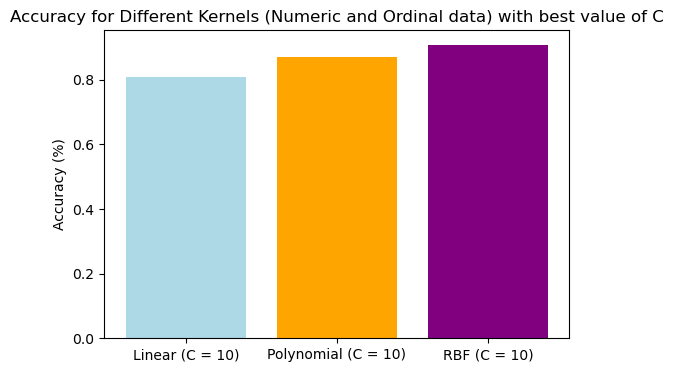

In [80]:
# Define colors for each kernel
colors = ['lightblue', 'orange', 'purple']

plt.figure(figsize=(6, 4))
plt.bar('Linear (C = 10)', accuracy_linear_23, color=colors[0])
plt.bar('Polynomial (C = 10)', accuracy_poly_23, color=colors[1])
plt.bar('RBF (C = 10)', accuracy_rbf_23, color=colors[2])

plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Different Kernels (Numeric and Ordinal data) with best value of C')
plt.show()

#### Bar graph of accuracy of SVM model for 3 Different Kernel with best C value for with and without ordinal data

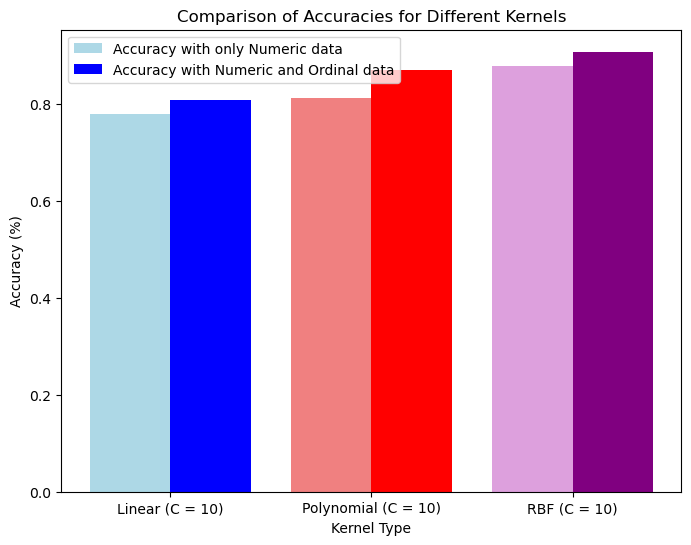

In [81]:
# Colors for light and dark shades
colors_light = ['lightblue', 'lightcoral', 'plum']
colors_dark = ['blue', 'red', 'purple']

# Labels and positions
labels = ['Linear (C = 10)', 'Polynomial (C = 10)', 'RBF (C = 10)']
x = np.arange(len(labels))

# Bar width
bar_width = 0.4

# Create the plot
plt.figure(figsize=(8, 6))
plt.bar(x - bar_width / 2, [accuracy_linear_13, accuracy_poly_13, accuracy_rbf_13], 
        color=colors_light, width=bar_width, label='Accuracy with only Numeric data')
plt.bar(x + bar_width / 2, [accuracy_linear_23, accuracy_poly_23, accuracy_rbf_23], 
        color=colors_dark, width=bar_width, label='Accuracy with Numeric and Ordinal data')

# Add labels and title
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Accuracies for Different Kernels')
plt.xticks(x, labels)
plt.legend()

# Show the plot
plt.show()

* We can observe that the accuracy of SVM model for all 3 kernels increased when we added the ordinal data for training by 3-5%.